In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data file
df = pd.read_csv('AirPassengers.csv')

#### Sanity Checks

In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Date,#Passengers
0,12-Jan-1949,112
1,24-Feb-1949,118
2,22-Mar-1949,132
3,5-Apr-1949,129
4,24-May-1949,121


In [5]:
df.tail()

,Date,#Passengers
139,16-Aug-1960,606
140,14-Sep-1960,508
141,20-Oct-1960,461
142,26-Nov-1960,390
143,4-Dec-1960,432


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
# convert column Date to datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
# timedelta is used for calculating an absolute time duration
week_delta = pd.to_timedelta(np.arange(5), unit = 'w')

In [11]:
week_delta

TimedeltaIndex(['0 days', '7 days', '14 days', '21 days', '28 days'], dtype='timedelta64[ns]', freq=None)

In [12]:
# add a time delta to a date
dates = pd.to_datetime(['08/28/2023', '10/02/2023', '12/04/2023', '01/01/2000', '10/08/1992'])

In [13]:
print(dates + week_delta)

DatetimeIndex(['2023-08-28', '2023-10-09', '2023-12-18', '2000-01-22',
               '1992-11-05'],
              dtype='datetime64[ns]', freq=None)


In [14]:
# time spans
pd.Period('2023')

Period('2023', 'A-DEC')

In [15]:
pd.Period('2023-10')

Period('2023-10', 'M')

In [16]:
pd.Period('2023-10-02')

Period('2023-10-02', 'D')

In [17]:
# date effects - daylight savings time in 2023
timestamp = pd.Timestamp('2023-10-02 00:00:00', tz = 'US/Central')
print(timestamp + pd.Timedelta(days = 1))

2023-10-03 00:00:00-05:00


In [18]:
# create year, month, day, and day name columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_name'] = df['Date'].dt.day_name()

In [19]:
df.head()

,Date,#Passengers,year,month,day,day_name
0,1949-01-12,112,1949,1,12,Wednesday
1,1949-02-24,118,1949,2,24,Thursday
2,1949-03-22,132,1949,3,22,Tuesday
3,1949-04-05,129,1949,4,5,Tuesday
4,1949-05-24,121,1949,5,24,Tuesday


In [20]:
# aggregate passengers by month
passengers_per_month = df.groupby(['month'])['#Passengers'].agg('sum')
passengers_per_month = passengers_per_month.reset_index()

In [21]:
passengers_per_month.sort_values(by = '#Passengers', ascending = False)

,month,#Passengers
6,7,4216
7,8,4213
5,6,3740
8,9,3629
4,5,3262
2,3,3242
3,4,3205
9,10,3199
11,12,3142
0,1,2901


In [22]:
# aggregate passengers by day
passengers_per_day = df.groupby(['day_name'])['#Passengers'].agg('sum')
passengers_per_day = passengers_per_day.reset_index()
passengers_per_day.sort_values(by = '#Passengers', ascending = False)

,day_name,#Passengers
2,Saturday,6920
3,Sunday,6174
0,Friday,6171
4,Thursday,6048
1,Monday,5442
6,Wednesday,5388
5,Tuesday,4220


Text(0.5, 1.0, 'Line Plot of #Passengers vs Month')

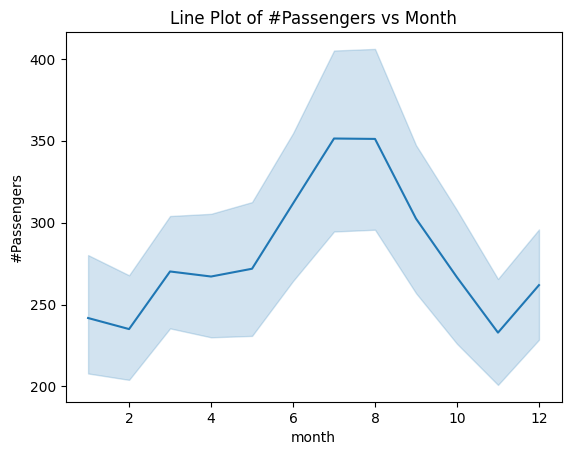

In [23]:
# use lineplot to display
ax = sns.lineplot(x = 'month', y = '#Passengers', data = df, errorbar = ('ci', 80)) # ci = confidence interval
ax.set_title("Line Plot of #Passengers vs Month")

In [24]:
# mean passengers per month
mean_passengers_per_month = df.groupby(['month'])['#Passengers'].agg('mean').reset_index()
mean_passengers_per_month

,month,#Passengers
0,1,241.750000
1,2,235.000000
2,3,270.166667
3,4,267.083333
4,5,271.833333
5,6,311.666667
6,7,351.333333
7,8,351.083333
8,9,302.416667
9,10,266.583333


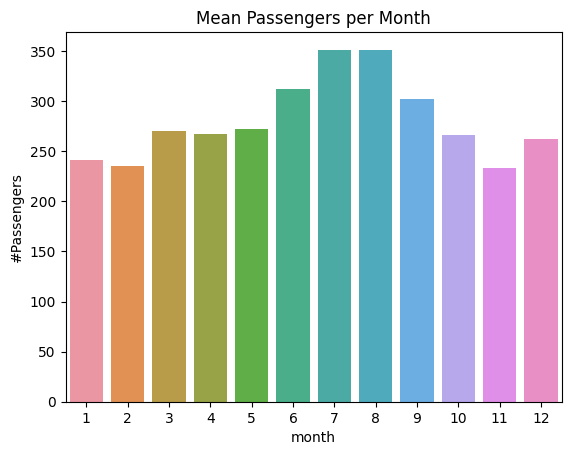

In [25]:
# create a bar plot
fig = sns.barplot(x = 'month', y = '#Passengers', data = mean_passengers_per_month)
fig.set_title("Mean Passengers per Month")
plt.show()

In [26]:
# compute z-score
p_mean = df['#Passengers'].mean()
p_std = df['#Passengers'].std()

In [27]:
# introduce a new column called zscore
df['zscore'] = (df['#Passengers'] - p_mean) / p_std
df['zscore_abs'] = abs(df['zscore'])
df.sort_values(by = 'zscore_abs', ascending = False)

,Date,#Passengers,year,month,day,day_name,zscore,zscore_abs
138,1960-07-02,622,1960,7,2,Saturday,2.848311,2.848311
139,1960-08-16,606,1960,8,16,Tuesday,2.714940,2.714940
127,1959-08-01,559,1959,8,1,Saturday,2.323164,2.323164
126,1959-07-29,548,1959,7,29,Wednesday,2.231471,2.231471
137,1960-06-02,535,1960,6,2,Thursday,2.123108,2.123108
...,...,...,...,...,...,...,...,...
55,1953-08-28,272,1953,8,28,Friday,-0.069175,0.069175
81,1955-10-13,274,1955,10,13,Thursday,-0.052503,0.052503
84,1956-01-28,284,1956,1,28,Saturday,0.030854,0.030854
85,1956-02-03,277,1956,2,3,Friday,-0.027496,0.027496


In [28]:
# obtain the outliers
df_high = df.sort_values(by = 'zscore', ascending = False).head(10)
df_low = df.sort_values(by = 'zscore', ascending = True).head(10)

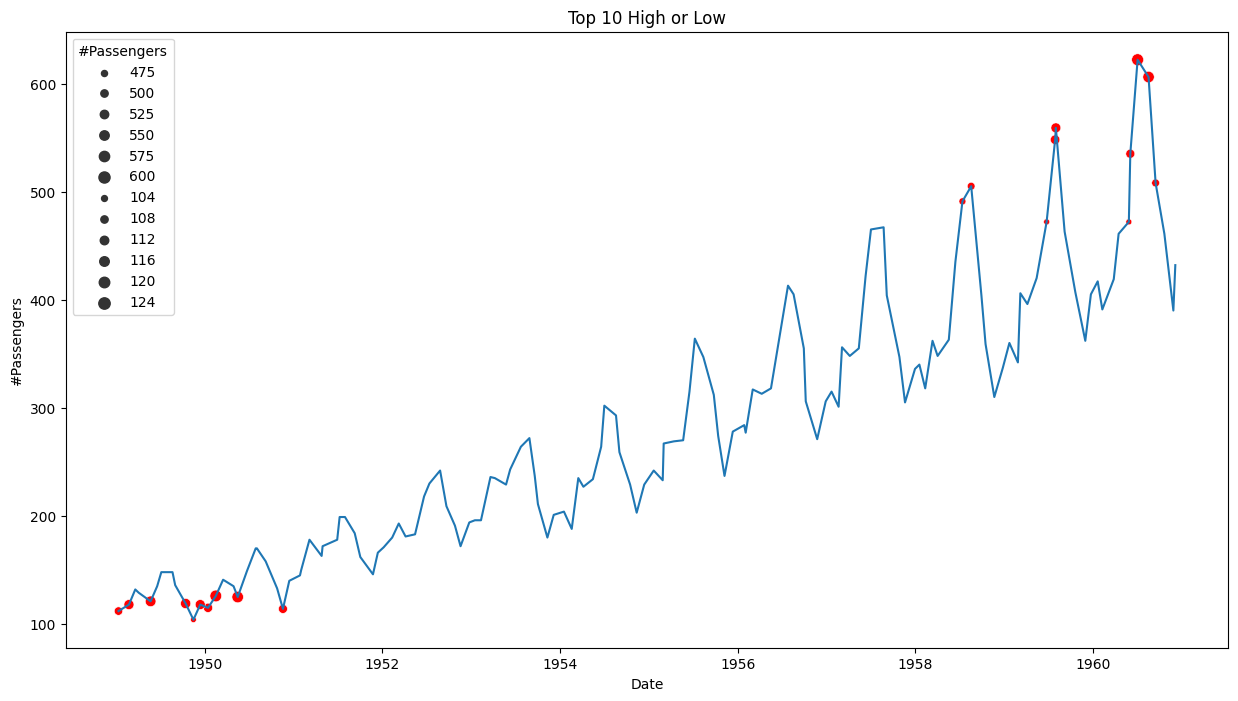

In [29]:
# plot the outliers
plt.figure(figsize = (15, 8))
plt.grid = True
plt.title('Top 10 High or Low')
ax = sns.lineplot(x = 'Date', y = '#Passengers', data = df)
ax = sns.scatterplot(x = 'Date', y = '#Passengers', data = df_high, size = '#Passengers', color = 'r')
ax = sns.scatterplot(x = 'Date', y = '#Passengers', data = df_low, size = '#Passengers', color = 'r')
plt.show()

#### Resampling Data

In [30]:
# read the data file
df1 = pd.read_csv('carpark.csv')

#### Sanity Checks

In [31]:
df1.shape

(35717, 4)

In [32]:
df1.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [33]:
df1.tail()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
35712,Shopping,1920,1517,2016-12-19 14:30:33
35713,Shopping,1920,1487,2016-12-19 15:03:34
35714,Shopping,1920,1432,2016-12-19 15:29:33
35715,Shopping,1920,1321,2016-12-19 16:03:35
35716,Shopping,1920,1180,2016-12-19 16:30:35


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [35]:
df1.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


In [36]:
df1['LastUpdated'] = pd.to_datetime(df1['LastUpdated'])

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SystemCodeNumber  35717 non-null  object        
 1   Capacity          35717 non-null  int64         
 2   Occupancy         35717 non-null  int64         
 3   LastUpdated       35717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [38]:
df1.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [39]:
# set LastUpdated as the index and remove the column
df2 = df1.set_index(pd.DatetimeIndex(df1['LastUpdated'])).drop('LastUpdated', axis = 1)

In [40]:
df2.head()

,SystemCodeNumber,Capacity,Occupancy
LastUpdated,,,
2016-10-04 07:59:42,BHMBCCMKT01,577,61
2016-10-04 08:25:42,BHMBCCMKT01,577,64
2016-10-04 08:59:42,BHMBCCMKT01,577,80
2016-10-04 09:32:46,BHMBCCMKT01,577,107
2016-10-04 09:59:48,BHMBCCMKT01,577,150


* Upsampling: change from higher granularity to lower granularity (e.g. minutes to seconds)
* Downsampling: change from lower granularity to higher granularity (e.g. months to years)

In [41]:
# resample on a daily basis
df3 = pd.DataFrame()
df3['Occupancy_Sum'] = df2['Occupancy'].resample('D').sum()
df3['Occupancy_Mean'] = df2['Occupancy'].resample('D').mean()

In [49]:
df3.head()

,Occupancy_Sum,Occupancy_Mean
LastUpdated,,
2016-10-04,330394,655.543651
2016-10-05,283040,655.185185
2016-10-06,275159,636.942130
2016-10-07,248954,576.282407
2016-10-08,177207,428.036232


Text(0, 0.5, 'Occupancy Mean')

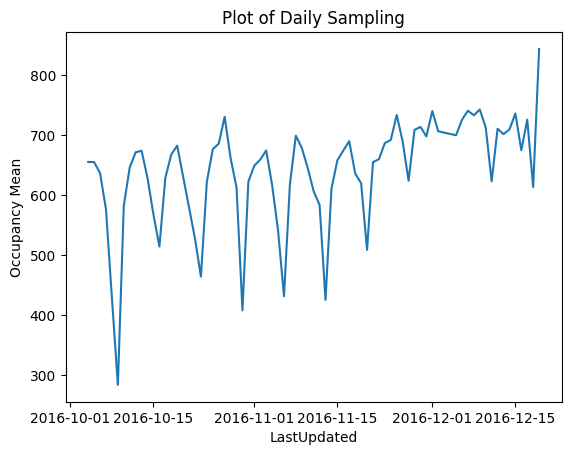

In [45]:
# make a plot with seaborn
ax = sns.lineplot(data = df3, x = 'LastUpdated', y = 'Occupancy_Mean')
ax.set_title('Plot of Daily Sampling')
ax.set_xlabel('LastUpdated')
ax.set_ylabel('Occupancy Mean')

In [53]:
# resample on monthly basis
df4 = pd.DataFrame()
df4['Occupancy_Sum'] = df2['Occupancy'].resample('M').sum()
df4['Occupancy_Mean'] = df2['Occupancy'].resample('M').mean()

In [50]:
df4.head()

,Occupancy_Sum,Occupancy_Mean
LastUpdated,,
2016-10-31,7492681,600.663861
2016-11-30,9564782,637.142419
2016-12-31,5881027,714.497266


Text(0, 0.5, 'Occupancy Mean')

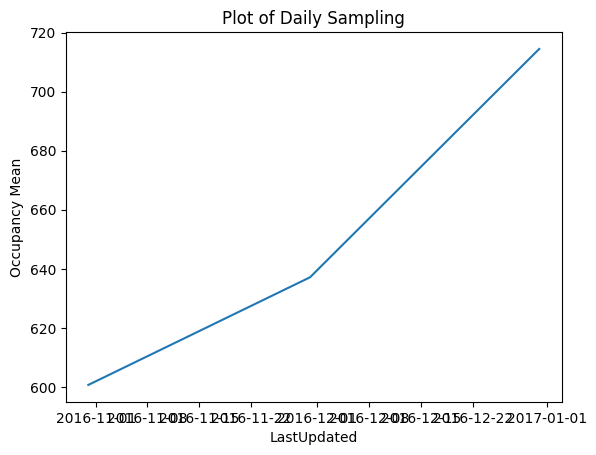

In [47]:
# make a plot with seaborn
ax = sns.lineplot(data = df4, x = 'LastUpdated', y = 'Occupancy_Mean')
ax.set_title('Plot of Monthly Sampling')
ax.set_xlabel('LastUpdated')
ax.set_ylabel('Occupancy Mean')

In [55]:
# resample on weekly basis
df5 = pd.DataFrame()
df5['Occupancy_Sum'] = df2['Occupancy'].resample('W').sum()
df5['Occupancy_Mean'] = df2['Occupancy'].resample('W').mean()

Text(0, 0.5, 'Occupancy Mean')

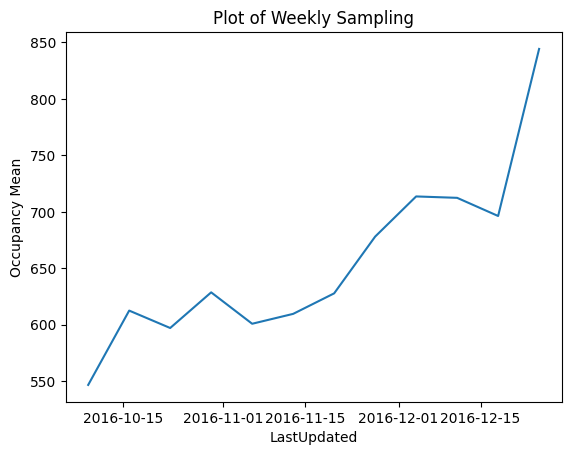

In [56]:
# make a plot with seaborn
ax = sns.lineplot(data = df5, x = 'LastUpdated', y = 'Occupancy_Mean')
ax.set_title('Plot of Weekly Sampling')
ax.set_xlabel('LastUpdated')
ax.set_ylabel('Occupancy Mean')